<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/I_VT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
from pprint import pprint
import pathlib
import os


In [5]:
CWD = pathlib.Path(os.path.abspath(""))
# DATA_DIR = CWD / 'data'
DATA_DIR = CWD / 'data_practice_run'
print(DATA_DIR)

c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run


In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xx

In [6]:
def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  data_headline = ndata['pos']
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  if 1.0 not in df:
    return [],[]
  df[1.0]=df[1.0].astype(int)
  #t=pdata.iloc[:, 0].values maybe we shoud use it...
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  print("File",filename,"opened")
  return x ,y

In [7]:
# we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    print(my_file)
    sam,lab = openfile(my_file)
    # print(sam)
    # print(lab)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  # print(samples)
  # print(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
# files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']
files_to_load = [file for file in DATA_DIR.iterdir()]

# Convert .mat to csv files
# def save_data(data, count):
#     if isinstance(data, np.ndarray) and data.dtype.kind in {'i', 'f'}:  # Check if the array is numerical
#         filename = "file" + str(count) + ".csv"
#         np.savetxt(filename, data, delimiter=',')
#         return True
#     elif data.dtype.names:  # compound dtype
#         flat_data = np.hstack([data[name].flatten()[:, np.newaxis] for name in data.dtype.names])
#         filename = "file" + str(count) + ".csv"
#         pd.DataFrame(flat_data, columns=data.dtype.names).to_csv(filename, index=False)
#         print(f"Saved structured array to {filename}")
#         return True
#     else:
#         return False

# count = 1
# for file in files_to_load:
#   data = loadmat(file)
#   for i in data:
#     if '__' not in i and 'readme' not in i:
#       if save_data(data[i], count):
#         count += 1
#       else:
#         print(f"Data under key '{i}' was not saved.")

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
print(x)
print(y)
# print(x.shape)
# print(y.shape)
#print(s1.shape)
#print(l1.shape)

c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH20_trial1_labelled_MN.mat
File c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH20_trial1_labelled_MN.mat opened
Number of samples so far: 0
c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH20_trial1_labelled_RA.mat
File c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH20_trial1_labelled_RA.mat opened
Number of samples so far: 1658
c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH34_img_Europe_labelled_MN.mat
File c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH34_img_Europe_labelled_MN.mat opened
Number of samples so far: 3316
c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH34_img_Europe_labelled_RA.mat
File c:\Users\Ythat\Desktop\GazeFixation\WebFixRT\script\data_practice_run\TH34_img_Europe_labelled_RA.mat opened
Number of samples so far: 8304
c:\Users\Ythat\Desktop\GazeFixa

In [8]:
y_expanded = np.expand_dims(y, axis=1)
print(y_expanded.shape)
xy = np.concatenate([x,np.expand_dims(y, axis=1)], axis=1)
print(xy.shape)

xy_dataframe = pd.DataFrame(xy, columns=["x", "y", "label"])
xy_dataframe.head()

xy_dataframe.to_csv("test.csv", index = False)

(197568, 1)
(197568, 3)


In [ ]:
#len(y1)

In [ ]:
#x,y=openfile('data/UH21_img_Rome_labelled_RA.mat')

#x,y=openfile('UH21_video_BergoDalbana_labelled_MN.mat')
#x,y=openfile('UH29_video_dolphin_fov_labelled_RA.mat')
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')
#x,y=openfile('data/UH29_video_dolphin_fov_labelled_RA.mat')

In [9]:
import math

In [ ]:
! pip install atan2

In [17]:
import csv
import numpy as np

# we assume that the frequency is 500Hz so there is 2ms gap between every two samples

def ivt2(data, v_threshold, verbose=0):
   Xs = data[:,[0]]
   Ys = data[:,[1]]
   prior_y = None
   prior_x = None

   diffX = [] 
   diffY = []

   velocity = []

   thresh = []

   for x,y in zip(Xs, Ys):
      if type(prior_x) == type(None) and type(prior_y) == type(None):
         prior_x = x
         prior_y = y
         continue

      dX = x - prior_x
      dY = y - prior_y
      diffX.append(dX)
      diffY.append(dY)

      v = np.abs((dX + dY)/2)
      velocity.append(v)

      if v < v_threshold:
         thresh.append(1)
      else:
         thresh.append(2)
      # print(f"x: {x} y: {y} prior_x: {prior_x} prior_y: {prior_y} dX: {dX} dY: {dY}")

      prior_x = x
      prior_y = y
   # print('thresh: ', thresh)
   return thresh, velocity



def ivt(data,v_threshold,verbose=0):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  diffX = [] #x values difference
  diffY = [] #y values difference 

  for i in range(len(data) - 1):
    diffX.append(float(Xs[i+1]) - float(Xs[i]) )
    diffY.append(float(Ys[i+1]) - float(Ys[i]) )
#   print('FINISHED')
  #distance = np.sqrt(np.power(diffX,2) + np.power(diffY,2))
  #velocity = np.divide(distance,2) # 2ms gap!
  #velocity = np.absolute(velocity)
  # Velocity = []
  velocity = []
  direction=[]
  for i in range(len(diffX)):
    v = np.abs((diffX[i] + diffY[i])/2)
    velocity.append(v)
   #  Velocity.append(diffX[i] + diffY[i])
   #  #direction.append(atan2(diffX[i], diffY[i]))
   #  velocity=np.divide(Velocity, 2)
   #  velocity=np.absolute(velocity)
#   print('FINISHED V')

  global mvmts 
  mvmts = []  
  #store 1 in mvmts[] if velocity is less than threshold else store 2
  for v in velocity:
    if(v<v_threshold):
        mvmts.append(1)
    else:
        mvmts.append(2)
#   print('FINISHED T')


  # if verbose==1: ## to show charts
  #   print(('minimum_velocity=',min(velocity)))
  #   print(('maximum_velocity=',max(velocity)))
  #   plt.plot(velocity)
  #   plt.xlabel("Time [ms]")
  #   plt.ylabel("Velocity [px/ms]")
  #   plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  #   #plt.plot([number * 10 for number in mvmts])
  #   plt.show()
  #   plt.ylim(0,5)
  #   plt.plot(velocity)
  #   #plt.plot([number for number in mvmts])
  #   plt.xlabel("Time [ms]")
  #   plt.ylabel("Velocity [px/ms]")
  #   plt.plot([0,len(velocity)],[v_threshold,v_threshold])
  return mvmts,velocity


In [18]:
# Visualisation of v_threshold
y1=ivt2(x, v_threshold=0.6,verbose=1)
# print('y1: ', y1[0])
y2=ivt(x, v_threshold=0.6,verbose=1)
# print(len(x))
# print(len(y1[0]))
# print(len(y2[0]))
# print(len(y1))

In [ ]:
#y1=ivt(x, v_threshold=2)

In [ ]:
# x.shape
# y.shape
# print(x.shape, y.shape)

In [19]:
#y1=(y1[:-1])
y_input=(y[:-1])
print(len(y))
print(len(y_input))
# y_input = (y[0:])


197568
197567


In [20]:
# thresholds=[x/10 for x in range(0,20)]
thresholds = np.linspace(0, 2, 20)
print(thresholds)

from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]
cohen_kappa=[]


for t in thresholds:
  y1=ivt2(x, v_threshold=t)[0]
  y_pred=np.array(y1)
  # pprint(y_pred)
  #print(len(y_real))
  print(len(x))
  print(len(y1))
  print(y_pred)
  print(y_input)
  cm=confusion_matrix(y_input, y_pred)
  #print(cm)
  print('classification_report for threshold', t, classification_report(y_input, y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y_input, y_pred))
  print(classification_report(y_input,y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  print("cm: ", cm)
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  print('treshold=', t)
  
  

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
197568
197567
[2 2 2 ... 2 2 2]
[1 1 1 ... 4 4 4]


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.0               precision    recall  f1-score   support

           1       0.00      0.00      0.00    120318
           2       0.07      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.07    197567
   macro avg       0.01      0.17      0.02    197567
weighted avg       0.01      0.07      0.01    197567

Kochen kappa for threshold 0.0 0.0


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ythat\AppData\Local\Temp\ipykernel_19932\1201559182.py:39: RuntimeWarning: invalid va

              precision    recall  f1-score   support

           1       0.00      0.00      0.00    120318
           2       0.07      1.00      0.14     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.07    197567
   macro avg       0.01      0.17      0.02    197567
weighted avg       0.01      0.07      0.01    197567

cm:  [[     0 120318      0      0      0      0]
 [     0  14668      0      0      0      0]
 [     0   8187      0      0      0      0]
 [     0  45708      0      0      0      0]
 [     0   8449      0      0      0      0]
 [     0    237      0      0      0      0]]
Fixation recall at threshol 0.0 is 0.0
Fixation precission at threshold 0.0 is nan
fixation_f1_score for threshold 0.0 is nan
Saccade recall at threshol 0.0 is 100.0
saccade_precisi

c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification_report for threshold 0.10526315789473684               precision    recall  f1-score   support

           1       0.64      0.20      0.31    120318
           2       0.09      0.98      0.17     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.20    197567
   macro avg       0.12      0.20      0.08    197567
weighted avg       0.40      0.20      0.20    197567

Kochen kappa for threshold 0.10526315789473684 0.022614644339316037


c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.64      0.20      0.31    120318
           2       0.09      0.98      0.17     14668
           3       0.00      0.00      0.00      8187
           4       0.00      0.00      0.00     45708
           5       0.00      0.00      0.00      8449
           6       0.00      0.00      0.00       237

    accuracy                           0.20    197567
   macro avg       0.12      0.20      0.08    197567
weighted avg       0.40      0.20      0.20    197567

cm:  [[24584 95734     0     0     0     0]
 [  318 14350     0     0     0     0]
 [  474  7713     0     0     0     0]
 [ 9360 36348     0     0     0     0]
 [ 3771  4678     0     0     0     0]
 [    7   230     0     0     0     0]]
Fixation recall at threshol 0.10526315789473684 is 20.432520487375122
Fixation precission at threshold 0.10526315789473684 is 98.72299413701711
fixation_f1_score for threshold 0.10526315789473684 is 33.85759537253822


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

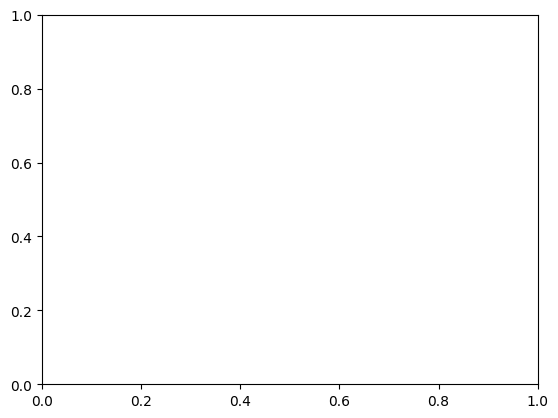

In [71]:
plt.plot(thresholds, fixation_recall, label="Fixation Recall")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade Recall")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("V_threshold [px/ms]")
plt.ylabel("Accuracy [%]")
plt.title("Velocity threshold vs Accuracy")
plt.legend()
plt.show()

In [19]:
print('Fixation recla=', fixation_recall)
print('saccade acuracy=', saccade_recall)

Fixation recla= [0.0, 20.432520487375122, 39.18283216143885, 55.01171894479629, 67.53935404511378, 76.9884805266045, 83.85943915291145, 88.66088199604381, 91.75767549327615, 93.93025150019116, 95.39636629598232, 96.4560581126681, 97.13259861367376, 97.67782044249405, 98.0368689639123, 98.33358267258431, 98.51809371831314, 98.66935953057731, 98.75662826842202, 98.84389700626673]
saccade acuracy= [100.0, 97.83201527133897, 95.6435778565585, 93.26424870466322, 91.21898009271884, 89.01690755385874, 87.07390237251158, 85.2536133078811, 83.48104717752932, 81.70166348513771, 79.99727297518407, 78.17698391055359, 76.30897191164439, 74.51595309517316, 72.99563676029452, 71.250340878102, 69.79820016362149, 68.29151895282247, 66.98254704117808, 65.7281156258522]
